In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
from sklearn import ensemble, metrics, svm, model_selection
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score

In [2]:
df_data = pd.read_csv('data/data1.csv')
df_data.head()

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,...,p16,p17,p18,p19,p20,s1,s2,ctf,binar,multi
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,...,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,191,0,0
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,...,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,190,0,0
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,...,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,189,0,0
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,...,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,188,0,0
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,...,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002,187,0,0


In [3]:
features = ['p00','p01','p02','p03','p04','p05','p06','p07','p08','p09','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','s1','s2']
data = df_data[features]

In [4]:
target = df_data['binar']

In [5]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 20, max_depth = 2, random_state = 2)
train_sizes, train_scores, test_scores = sk.model_selection.learning_curve(rf_classifier, data, target, 
                                                                       train_sizes = np.arange(0.1, 1, 0.1), cv = 2, shuffle=True)

In [6]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 806 1613 2420 3227 4034 4841 5648 6455 7262]
[0.94044665 0.93242405 0.93739669 0.93445925 0.93728309 0.93400124
 0.93510977 0.93330751 0.93321399]
[0.92873962 0.93035072 0.9318379  0.93134217 0.93171397 0.93109431
 0.93239559 0.93208576 0.93239559]


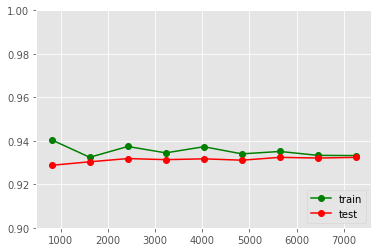

In [7]:
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
plt.ylim((0.90, 1))
plt.legend(loc = 'lower right')

In [8]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 2)
print('Training data Shape:', train_data.shape)
print('Training target Shape:', train_target.shape)
print('Testing data Shape:', test_data.shape)
print('Testing target Shape:', test_target.shape)
rf = ensemble.RandomForestClassifier(n_estimators = 20, max_depth = 2, random_state = 2)
rf.fit(train_data, train_target);
predictions = rf.predict_proba(test_data)[:,1]

Training data Shape: (11296, 23)
Training target Shape: (11296,)
Testing data Shape: (4842, 23)
Testing target Shape: (4842,)


In [9]:
data_predictions = predictions[0:len(target)]
print(data_predictions)

[0.87786581 0.04258123 0.05380457 ... 0.8904435  0.04495932 0.59148623]


In [10]:
precision = precision_score(test_target, np.rint(data_predictions))
precision

0.9217171717171717

In [11]:
recall = recall_score(test_target, np.rint(data_predictions))
recall

0.7234886025768087

In [12]:
f1_score(test_target, np.rint(data_predictions))

0.8106607440310939

In [13]:
roc_auc_score(test_target, data_predictions)

0.97504005820819

In [14]:
fpr, tpr, thresh_roc = metrics.roc_curve(test_target, data_predictions)
roc_auc = metrics.auc(fpr, tpr)

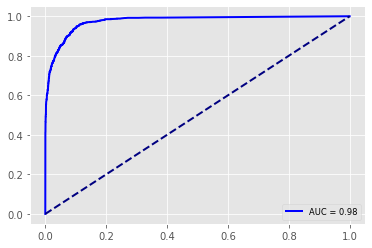

In [15]:
plt.plot(fpr, tpr, 'blue', lw=2, label='AUC = %0.2f'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right", fontsize='small')

In [16]:
average_precision = average_precision_score(test_target, data_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.93


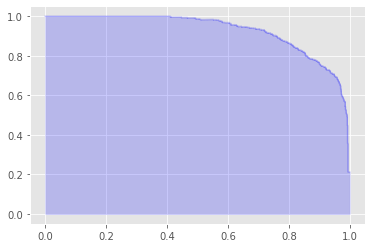

In [17]:
precision, recall, _ = precision_recall_curve(test_target, data_predictions)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')


In [18]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear'), data, target, 
                                                         train_sizes = np.arange(0.1, 1, 0.1), cv=3)

In [19]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[1075 2151 3227 4303 5379 6454 7530 8606 9682]
[0.95131783 0.95242523 0.94979857 0.9479433  0.94670633 0.94241297
 0.93966357 0.93880239 0.94009502]
[0.92619824 0.93301486 0.93530765 0.93710446 0.93834382 0.93871567
 0.93890142 0.93921128 0.93958299]


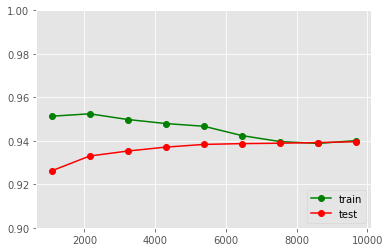

In [20]:
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
plt.ylim((0.90, 1))
plt.legend(loc = 'lower right')

In [21]:
model = svm.SVC(kernel='linear', C = 1)
model.fit(train_data, train_target)
y_predict = model.predict(test_data)
print(recall_score(test_target, y_predict))
print(precision_score(test_target, y_predict))
print(f1_score(test_target, y_predict))
Y_predictions = y_predict[0:len(target)]
print(Y_predictions)

0.8186323092170465
0.8853161843515541
0.8506694129763132
[1 0 0 ... 1 0 1]


In [22]:
roc_auc_score(test_target, Y_predictions)

0.8953584191532664